In [138]:
import itertools
from collections import Counter
from parse import load_dataframes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import folium

In [84]:
font_list = fm.findSystemFonts(fontpaths=None, fontext="ttf")
if any(["nanumgothic" in font.lower() for font in font_list]):
    plt.rcParams["font.family"] = "nanumgothic"
else:
    if not any(["malgun" in font.lower() for font in font_list]):
        raise Exception(
            "Font missing, please install Noto Sans CJK or Malgun Gothic. If you're using ubuntu, try `sudo apt install fonts-noto-cjk`"
        )

    plt.rcParams["font.family"] = "Malgun Gothic"
sns.set_palette(sns.color_palette("Spectral"))
plt.rc("xtick", labelsize=6)

In [3]:
dataframes = load_dataframes()

In [4]:
dataframes["stores"].sort_values(["review_cnt"], ascending=False).head()

,id,store_name,branch,area,tel,address,latitude,longitude,category,review_cnt
145024,145030,명동교자,본점,명동,02-776-5348,서울특별시 중구 명동2가 25-2,37.562571,126.985757,칼국수|만두,101
309323,309336,우진해장국,None,제주도,064-757-3393,제주특별자치도 제주시 삼도2동 831,33.511522,126.520038,고사리육개장|몸국,70
346823,346836,정돈,,대학로,02-987-0924,서울특별시 종로구 명륜4가 107 지하1층,37.581813,127.001091,안심돈까스|돈까스,65
187593,187601,봉포머구리집,None,속초,033-631-2021,강원도 속초시 영랑동 148-30,38.218768,128.593193,성게알밥|물회,64
305893,305906,우래옥,본점,을지로,02-2265-0151,서울특별시 중구 주교동 118-1,37.568190,126.998737,평양냉면|불고기,63


In [5]:
def show_store_categories_graph(dataframes, n=100):
    """
    Tutorial: 전체 음식점의 상위 `n`개 카테고리 분포를 그래프로 나타냅니다.
    """

    stores = dataframes["stores"]

    # 모든 카테고리를 1차원 리스트에 저장합니다
    categories = stores.category.apply(lambda c: c.split("|"))
    categories = itertools.chain.from_iterable(categories)

    # 카테고리가 없는 경우 / 상위 카테고리를 추출합니다
    categories = filter(lambda c: c != "", categories)
    categories_count = Counter(list(categories))
    best_categories = categories_count.most_common(n=n)
    df = pd.DataFrame(best_categories, columns=["category", "count"]).sort_values(
        by=["count"], ascending=False
    )

    # 그래프로 나타냅니다
    chart = sns.barplot(x="category", y="count", data=df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    plt.title("음식점 카테고리 분포")
    plt.show()

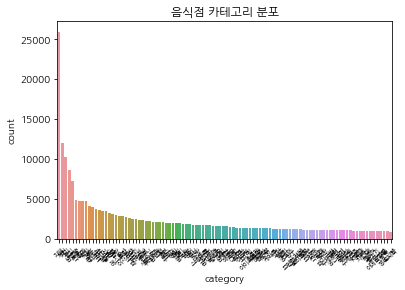

In [106]:
show_store_categories_graph(dataframes)

In [6]:
stores = dataframes["stores"]
categories = stores.category.apply(lambda category: category.split("|"))
print(type(stores.category))
categories

<class 'pandas.core.series.Series'>


0          [아구찜, 포장마차]
1                 [카페]
2           [피쉬앤칩스, 펍]
3         [레스토랑, 카프레제]
4         [디저트카페, 디저트]
              ...     
459983              []
459984              []
459985              []
459986              []
459987              []
Name: category, Length: 459988, dtype: object

In [7]:
categories = stores.category.apply(lambda c: c.split("|"))
categories = itertools.chain.from_iterable(categories)
# Series를 1차원 이터레이터로 변환

# 카테고리가 없는 경우 / 상위 카테고리를 추출합니다
categories = filter(lambda c: c != "", categories)
# 이터레이터를 필터 객체로 변환하며, 빈 값 제거
categories_count = Counter(list(categories))
best_categories = categories_count.most_common(n=10)
best_categories

[('카페', 25938),
 ('치킨', 12035),
 ('커피', 10179),
 ('술집', 8540),
 ('삼겹살', 7243),
 ('족발', 4788),
 ('떡볶이', 4763),
 ('피자', 4690),
 ('횟집', 4664),
 ('짬뽕', 4067)]

In [8]:
df = pd.DataFrame(best_categories, columns=["category", "count"]).sort_values(
    by=["count"], ascending=False
)
df

,category,count
0,카페,25938
1,치킨,12035
2,커피,10179
3,술집,8540
4,삼겹살,7243
5,족발,4788
6,떡볶이,4763
7,피자,4690
8,횟집,4664
9,짬뽕,4067


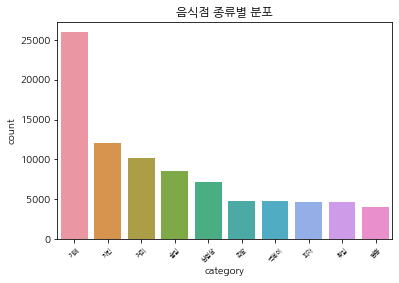

In [9]:
chart = sns.barplot(x="category", y="count", data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("음식점 종류별 분포")
plt.show()

# 전체 음식점의 리뷰 개수 분포

In [203]:
stores = dataframes["stores"]
review_cnt = stores.groupby("review_cnt")["review_cnt"].count().reset_index(name="count")
review_cnt = review_cnt[review_cnt["review_cnt"] > 0]

d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0

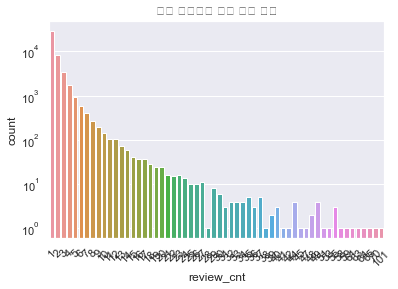

In [204]:
chart = sns.barplot(x="review_cnt", y="count", data=review_cnt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set(yscale="log")
plt.title("전체 음식점의 리뷰 개수 분포")
plt.show()

# 음식점의 평균 평점

In [63]:
stores_reviews = pd.merge(dataframes["stores"], dataframes["reviews"], left_on="id", right_on="store")
store_mean_score = stores_reviews.groupby("store")["score"].mean().reset_index(name="mean_score")
store_mean_score["mean_score"] = store_mean_score["mean_score"].round(decimals=1)
mean_score_count = store_mean_score.groupby("mean_score").size().reset_index(name="count")
mean_score_count.sort_values("count", ascending=False)

,mean_score,count
29,4.0,13705
39,5.0,11081
19,3.0,7381
34,4.5,2116
1,1.0,1921
9,2.0,1744
24,3.5,1610
32,4.3,775
26,3.7,671
27,3.8,546


d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0

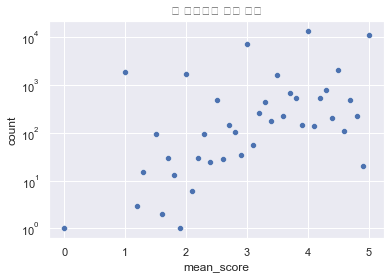

In [206]:
chart = sns.scatterplot(x="mean_score", y="count", data=mean_score_count)
chart.set(yscale="log")
plt.title("각 음식점의 평균 평점")
plt.show()

# 전체 유저의 리뷰 개수 분포

In [41]:
users_reviews

,id_x,gender,age,id_y,store,user,score,content,reg_time
0,68632,남,32,1,15,68632,5,전포 윗길에 새로 생긴! 호주에서 온 쉐프가 직접 요리하는 호주식 레스토랑!,1970-01-01 00:00:00
1,68632,남,32,326,1216,68632,5,간단하게 먹으러 갔다가 얼큰우동에 반하고 나오는 24시 우동집!,1970-01-01 00:00:00
2,68632,남,32,1413,8756,68632,5,식사보다는 말그대로 피맥으로 한잔하기에 딱 좋은 피자!,1970-01-01 00:00:00
3,68632,남,32,1528,9460,68632,5,파란 컨테이너의 외관부터 너무 이쁜 건대 커멘그래운드 2층의 루프탑카페! 분위기 좋...,2019-04-06 12:52:22
4,68632,남,32,4681,13745,68632,5,가야공원에서 제일 맛있는 오리고기집~ 다 먹고 볶음밥 볶아 먹으면.. 크~~,2018-11-28 15:12:33
...,...,...,...,...,...,...,...,...,...
91393,171391,남,29,2367,360464,171391,4,엄청 특별한 맛은 아니지만 깔끔하고 담백한 규동 맛이다.\n화목토에는 규동을 월수금...,1970-01-01 00:00:00
91394,518267,여,27,2376,360465,518267,5,"일식, 가정식, 혼밥을 즐기는 분 두 번 가세요. 세 번 가세요",2016-12-19 17:20:18
91395,280855,남,34,2382,360467,280855,5,맛있는데 평이 왜이러냐 ㅋㅋㅋ친절도 괜찮음 이정도 친절이면 괜찮지 뭘 저렇게 바라는...,1970-01-01 00:00:00
91396,456281,남,55,2393,360486,456281,4,,2017-04-23 20:15:54


In [208]:
users_reviews = pd.merge(dataframes["users"], dataframes["reviews"], left_on="id", right_on="user")
# users_reviews
users_review_cnt = pd.DataFrame(users_reviews.groupby(["user"]).size().reset_index(name="review_cnt"))
grouped = users_review_cnt.groupby(["review_cnt"]).size().reset_index(name="count")
grouped
# sorted_users = users_review_cnt.sort_values(["review_cnt"], ascending=False).head(n=20)
# sorted_users

,review_cnt,count
0,1,11682
1,2,2609
2,3,1122
3,4,704
4,5,449
...,...,...
172,352,1
173,362,1
174,380,1
175,389,1


d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0

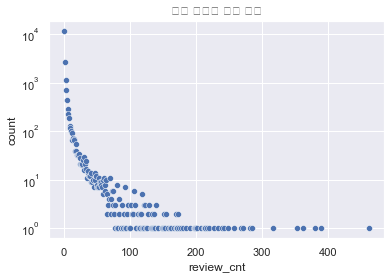

In [211]:
chart = sns.scatterplot(data=grouped, x="review_cnt", y="count")
chart.set(yscale="log")
plt.title("전체 유저의 리뷰 개수")
plt.show()

# 유저 나이대, 성별 분포 구하기

In [99]:
users = dataframes["users"]

users = users[(0 < users["age"]) & (users["age"] < 100)]
# 전처리 (음수의 값을 갖는 나이는 삭제)

grouped_users = users.groupby(["gender", "age"]).size().reset_index(name="count")
grouped_users

,gender,age,count
0,남,4,1
1,남,5,2
2,남,7,1
3,남,9,1
4,남,12,1
...,...,...,...
149,여,87,1
150,여,88,1
151,여,89,2
152,여,90,2


In [100]:
users.sort_values("age", ascending=False).head(30)

,id,gender,age
3302,757830,여,91
18044,27987,여,90
13472,889963,여,90
15495,197442,여,89
11868,157670,여,89
17780,484363,여,88
18697,42466,남,88
12281,343053,여,87
5446,176668,여,86
4267,71250,여,85


d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)


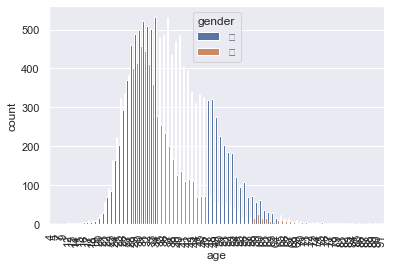

In [217]:
sns.countplot(data=users, x="age", hue="gender")
plt.xticks(rotation="vertical")
plt.show()

d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\ssafy\2nd semester\pjt\2nd_project\sub1\sub1\venv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)


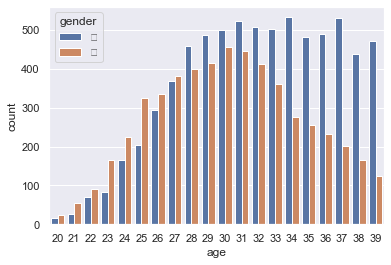

In [219]:
users = dataframes["users"]

users = users[(19 < users["age"]) & (users["age"] < 40)]
chart = sns.countplot(x="age", hue="gender", data=users)
sns.move_legend(chart, "upper left")

# 각 음식점의 위치 분포

In [134]:
stores = dataframes["stores"]
stores = stores.astype({"latitude": float, "longitude": float})
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459988 entries, 0 to 459987
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          459988 non-null  int64  
 1   store_name  459988 non-null  object 
 2   branch      23460 non-null   object 
 3   area        443274 non-null  object 
 4   tel         449759 non-null  object 
 5   address     459931 non-null  object 
 6   latitude    459987 non-null  float64
 7   longitude   459987 non-null  float64
 8   category    459988 non-null  object 
 9   review_cnt  459988 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 35.1+ MB


In [135]:
stores = stores[(stores["latitude"] > 0) & (stores["longitude"] > 0)]
stores

,id,store_name,branch,area,tel,address,latitude,longitude,category,review_cnt
0,1,Agal,None,홍대,010-6689-5886,서울특별시 마포구 동교동 170-13,37.556862,126.926666,아구찜|포장마차,0
1,2,Assisy,None,광주,062-367-0700,광주광역시 서구 농성동 631-33,35.150746,126.890062,카페,0
2,3,Battered Sole,None,이태원,02-749-6867,서울특별시 용산구 이태원동 118-9,37.535032,126.991664,피쉬앤칩스|펍,0
3,4,Chakyoung,None,달맞이길,051-756-5566,부산광역시 해운대구 중2동 1509-5,35.158587,129.175004,레스토랑|카프레제,0
4,5,Delabobo,None,발산역,02-2667-9854,서울특별시 강서구 등촌동 689,37.559904,126.840512,디저트카페|디저트,0
...,...,...,...,...,...,...,...,...,...,...
459983,459996,행복부대찌개,None,녹양동,031-877-2410,경기도 의정부시 녹양동 154-6,37.757939,127.032758,,0
459984,459997,행복부페,None,안중읍,031-682-1733,경기도 평택시 안중읍 용성리 718-3,37.002743,126.944991,,0
459985,459998,행복분식,None,퇴촌면,031-8071-2668,경기도 광주 퇴촌면 도수리 611-6,37.471677,127.315744,,0
459986,459999,행복분식,None,소주동,055-312-3713,경상남도 양산시 소주동 147-1,35.407860,129.158564,,0


In [197]:
def showMap(data):
    lat = data["latitude"].mean()
    long = data["longitude"].mean()

    m = folium.Map([lat, long], zoom_start=8)
    for i in data.index:
        folium.Marker([data.loc[i, "latitude"], data.loc[i, "longitude"]], tooltip = data.loc[i, "store_name"]).add_to(m)
    return m

## 모든 가게 보여주기

### 너무 많은 가게라 렌더링이 되지 않음

## 평점 4점 이상 가게 보여주기

In [148]:
stores_reviews = pd.merge(dataframes["stores"], dataframes["reviews"], left_on="id", right_on="store")
stores_reviews

,id_x,store_name,branch,area,tel,address,latitude,longitude,category,review_cnt,id_y,store,user,score,content,reg_time
0,15,써리힐,,전포동,010-7574-4533,부산광역시 부산진구 전포동 229-13번지 2층,35.155521,129.067316,호주레스토랑,1,1,15,68632,5,전포 윗길에 새로 생긴! 호주에서 온 쉐프가 직접 요리하는 호주식 레스토랑!,1970-01-01 00:00:00
1,18,진삼미 샌드위치,,전주,063-221-9801,전라북도 전주시 완산구 효자동1가 652 상산고등학교앞,35.803488,127.115123,샌드위치|쥬스,1,2,18,389728,5,샌드위치 내용물도 알차게 들어있고 맛있었어요 가성비 추천,1970-01-01 00:00:00
2,19,한옥마을 전주비빔밥,향남점,향남지구,,경기도 화성시 향남읍 행정리 487-1 홈플러스 화성향남점 1층,37.130733,126.921854,전주비빔밥,1,3,19,68716,4,홈플러스 1층 매장 푸드코트 내 있는 매장인데 계란찜정식은 처음보고 시켜봣는데 사진...,1970-01-01 00:00:00
3,37,007식당,None,영광,061-356-2216,전라남도 영광군 법성면 법성리 1148-6,35.355546,126.449887,굴비정식|굴비,1,4,37,774353,2,"전 여기 5년전에 가봤었는데 그때 기억은 별로였어요\n단체손님이 많았고, 차려지는건...",1970-01-01 00:00:00
4,38,010수산,None,발산역,02-3661-3739,서울특별시 강서구 등촌동 671-3,37.559100,126.842000,횟집,1,5,38,115682,3,친구들끼리 술 간단하게마시러 감. 스끼다시 괜찮지만 회 양이 조금 부족한 느낌. 맛...,2019-03-15 22:16:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91393,360499,지구촌한우생고기,None,해운대,051-704-9595,부산광역시 해운대구 중2동 503-1,35.162518,129.191020,한우,1,2401,360499,17371,5,,1970-01-01 00:00:00
91394,360505,지군포차,None,역곡,032-341-2340,경기도 부천시 역곡동 77-12,37.485732,126.810308,국물닭발|닭발,1,2402,360505,198050,4,닭발이 소스가 매운데 중독성있는 맛입니다. 마지막에 볶음밥 꼭드세요,1970-01-01 00:00:00
91395,360514,지글,None,정자동,031-716-9291,경기도 성남시 분당구 정자동 162-2,37.362219,127.105220,고기뷔페|소고기,2,2403,360514,190766,5,늘 사람 많은 곳입니다. 소고기만 먹어도 배불러요! 굿,1970-01-01 00:00:00
91396,360514,지글,None,정자동,031-716-9291,경기도 성남시 분당구 정자동 162-2,37.362219,127.105220,고기뷔페|소고기,2,2404,360514,201564,4,고기가 엄청많이 먹고싶을 때 종종 들리는 곳이에요\n뷔페처럼 샐러드바에 사이드메뉴가...,1970-01-01 00:00:00


가게 평점 구하기

In [194]:
stores = stores_reviews.groupby(["store", "store_name", "latitude", "longitude", "review_cnt"])["score"].mean().reset_index(name="mean_score")
stores = stores.astype({"latitude": float, "longitude": float})
stores["mean_score"] = stores["mean_score"].round(decimals=1)
stores = stores[(stores["mean_score"] >= 4) & (stores["latitude"] > 0) & (stores["longitude"] > 0) & (stores["review_cnt"] >= 10)].reset_index().drop(columns=["index"], axis=1)
stores

,store,store_name,latitude,longitude,review_cnt,mean_score
0,221,10Q,37.508087,127.112586,12,5.0
1,642,1967 바다지음,34.745185,127.744854,10,4.8
2,2476,4SEED,37.604625,126.965985,11,5.0
3,2492,4브라더스,37.484028,127.045280,16,4.1
4,12507,가마마루이,37.560369,126.933323,19,4.0
...,...,...,...,...,...,...
341,355894,좌수영 바게트버거,34.741037,127.736108,13,4.1
342,356196,주,37.493255,126.989307,12,4.1
343,356545,주막 보리밥,37.625909,126.891935,10,4.0
344,359300,중앙해장,37.508313,127.065468,33,4.2


In [198]:
m = showMap(stores)
m

In [200]:
dataframes["stores"].sort_values("review_cnt", ascending=False)

,id,store_name,branch,area,tel,address,latitude,longitude,category,review_cnt
145024,145030,명동교자,본점,명동,02-776-5348,서울특별시 중구 명동2가 25-2,37.562571,126.985757,칼국수|만두,101
309323,309336,우진해장국,None,제주도,064-757-3393,제주특별자치도 제주시 삼도2동 831,33.511522,126.520038,고사리육개장|몸국,70
346823,346836,정돈,,대학로,02-987-0924,서울특별시 종로구 명륜4가 107 지하1층,37.581813,127.001091,안심돈까스|돈까스,65
187593,187601,봉포머구리집,None,속초,033-631-2021,강원도 속초시 영랑동 148-30,38.218768,128.593193,성게알밥|물회,64
305893,305906,우래옥,본점,을지로,02-2265-0151,서울특별시 중구 주교동 118-1,37.568190,126.998737,평양냉면|불고기,63
...,...,...,...,...,...,...,...,...,...,...
162904,162911,밀양돼지국밥,None,용원,055-552-6172,경남 창원시 진해구 용원동 1134-1,35.095470,128.819400,돼지국밥,0
162901,162908,밀양돼지국밥,None,광안리,051-754-0564,부산광역시 수영구 민락동 176-21,35.155774,129.123100,돼지국밥|수육백반,0
162900,162907,밀양돼지국밥,None,감천문화마을,051-515-6878,부산광역시 금정구 구서동 175-13,35.256674,129.090904,돼지국밥|국밥,0
162899,162906,밀양돼지국밥,None,양산,055-387-6220,경상남도 양산시 덕계동 669-18,35.376120,129.152800,돼지국밥,0
